In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from utils import clustering_old as clustering
from utils import CommonFunctions_old as CF

import importlib
importlib.reload(clustering)
importlib.reload(CF)

import networkx as nx
import igraph as ig

In [69]:
def create_graph_comms(N, num_groups, mean_deg, p_in, p_out):
    nodes_per_group = N//num_groups;
    print('Block model probs: in %f - out %f' % (p_in, p_out))

    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

    while nx.is_connected(G_gn) == 0:
        print('The network should be in a single component. New trial!')
        G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

    infoG_gn = ['GN',k_out]

    print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))
    
    return G_gn

In [5]:
N = 128
num_groups = 4
mean_deg = 16
k_out = .2

In [6]:
G_gn = create_graph_comms(N, num_groups, mean_deg, k_out)
A_gn = nx.to_numpy_array(G_gn)

G_rand = nx.random_reference(G_gn, niter=1)
A_rand = nx.to_numpy_array(G_rand)

Block model probs: in 0.493750 - out 0.002083
Mean degree 15.65625


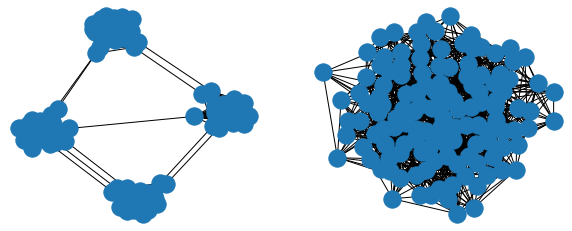

In [7]:
plt.figure(figsize=(10,4))
ax = plt.subplot(1,2,1)
nx.draw(G_gn, ax=ax)
ax = plt.subplot(1,2,2)
nx.draw(G_rand, ax=ax)

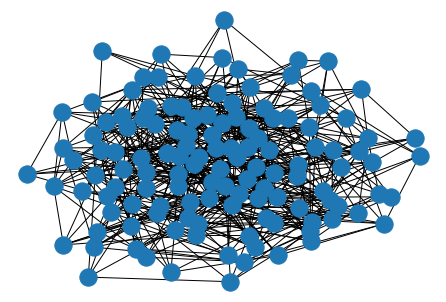

In [8]:
G_er = nx.fast_gnp_random_graph(N, p=0.076)
A_er = nx.to_numpy_array(G_er)
nx.draw(G_er)
plt.show()

In [9]:
G_fc = nx.fast_gnp_random_graph(N, p=1)
A_fc = nx.to_numpy_array(G_fc)

# Diffusion distance

COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method complete...
- Loop over induced graphs...


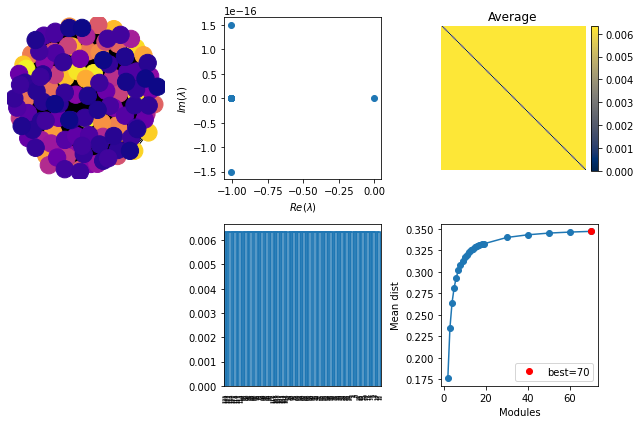

In [50]:
res_gn = clustering.clustering_diffusion_distance(A_fc, method='complete')

COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


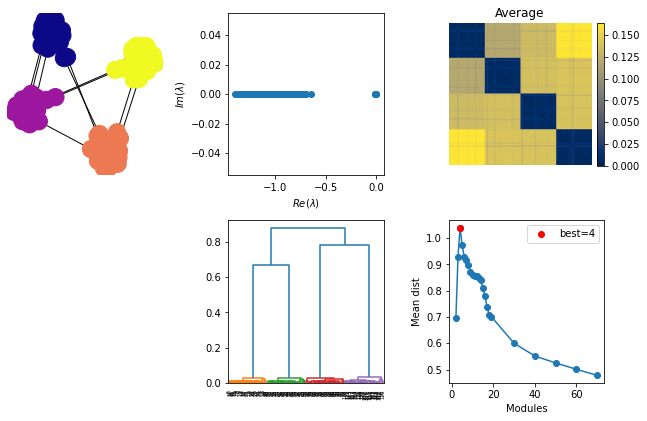

In [51]:
res_gn = clustering.clustering_diffusion_distance(A_gn, method='ward')

COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


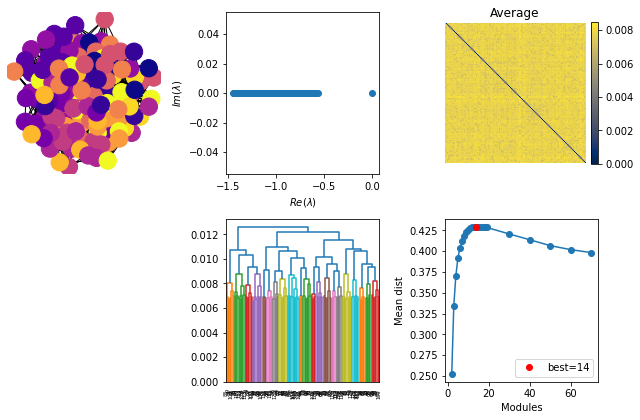

In [52]:
res_er = clustering.clustering_diffusion_distance(A_rand, method='ward')

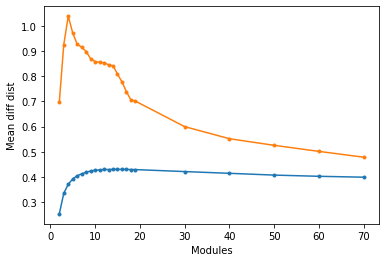

In [53]:
plt.plot(res_er[0], res_er[-3], '.-')
plt.plot(res_gn[0], res_gn[-3], '.-')

plt.xlabel('Modules')
plt.ylabel('Mean diff dist')

plt.show()

In [70]:
groups = [2, 3, 4, 5, 6, 7, 8]

for num_groups in groups:
    mat = create_graph_comms(N, num_groups, mean_deg, p_in=0.9, p_out=0.01)
    
    mat = nx.to_numpy_array(mat)
    
    res_gn = clustering.clustering_diffusion_distance(mat, method='ward')

Block model probs: in 0.900000 - out 0.010000
Mean degree 57.09375
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

KeyboardInterrupt: 

Block model probs: in 0.900000 - out 0.010000
Mean degree 11.033333333333333
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/120 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


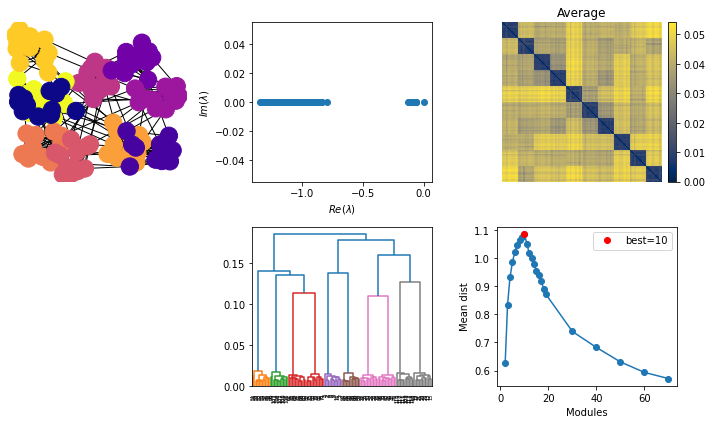

Block model probs: in 0.900000 - out 0.010000
Mean degree 7.833333333333333
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/120 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


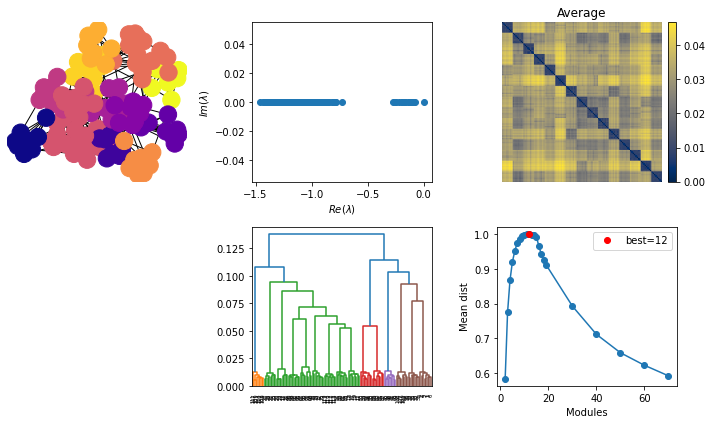

Block model probs: in 0.900000 - out 0.010000
Mean degree 5.7
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/120 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


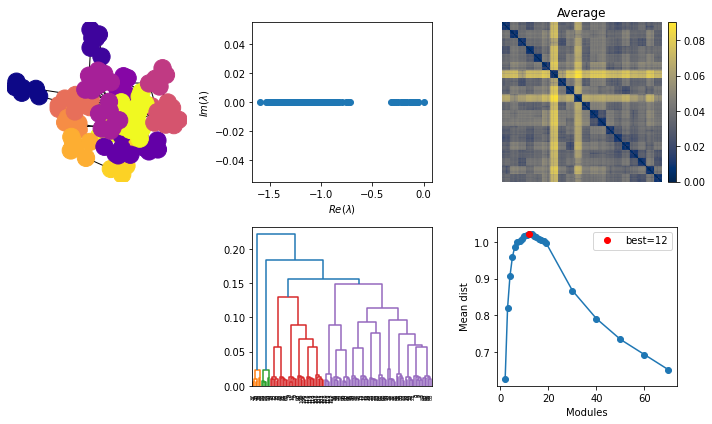

Block model probs: in 0.900000 - out 0.010000
Mean degree 4.416
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/125 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


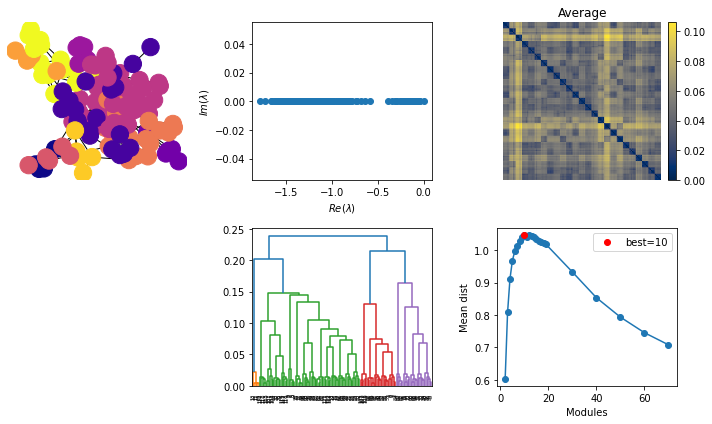

Block model probs: in 0.900000 - out 0.010000
The network should be in a single component. New trial!
Mean degree 3.9833333333333334
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/120 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


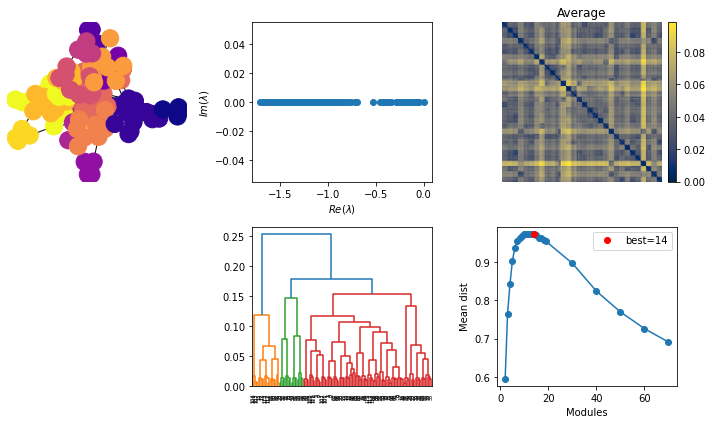

In [72]:
groups = [10, 15, 20, 25, 30]

for num_groups in groups:
    mat = create_graph_comms(N, num_groups, mean_deg, p_in=0.9, p_out=0.01)
    
    mat = nx.to_numpy_array(mat)
    
    res_gn = clustering.clustering_diffusion_distance(mat, method='ward')

# Jacobian distance - Noisy Voter Model

In [15]:
#         Average distance - induce distance
# OPZ 1           X                X
# OPZ 2           V                X
# OPZ 3           X                V
# OPZ 4           V                V

# => OPZ 1 or 2 are ok, 3 and 4 not working

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: NoisyVM


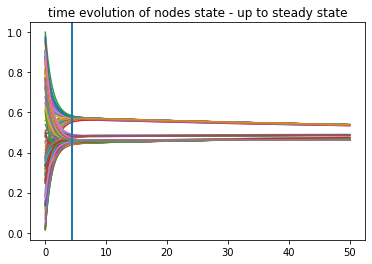

- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


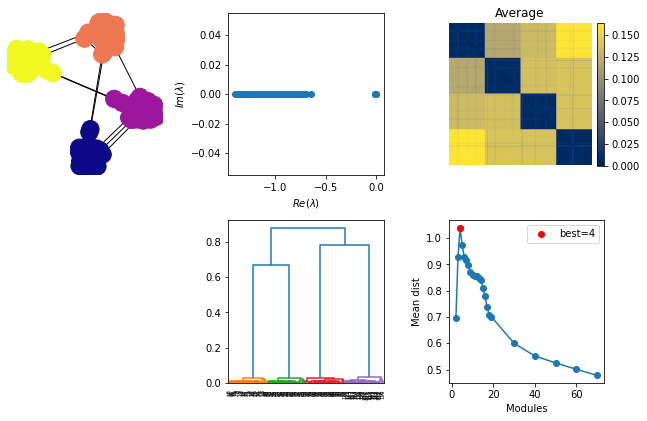

In [54]:
# Opz 1
res_nvm = clustering.clustering_jacobian_distance(A_gn, 'NoisyVM', clust_max=20, tmax=2, norm=False, norm_ind=False, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: NoisyVM


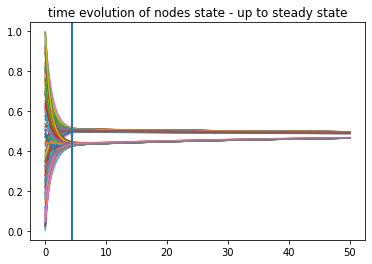

Normalizing jacobian - $\lambda_{max}=$1.3975974505442637
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


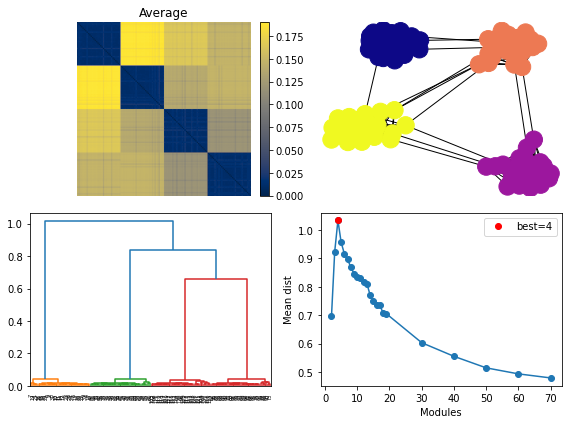

In [14]:
# Opz 2
res_nvm = clustering.clustering_jacobian_distance(A_gn, 'NoisyVM', clust_max=20, tmax=2, norm=True, norm_ind=False, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: NoisyVM


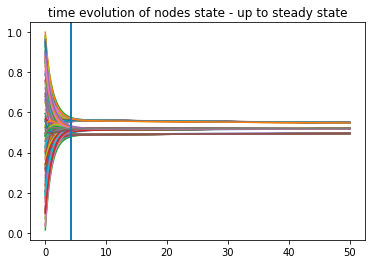

- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...
Normalizing jacobian - $\lambda_{max}=$0.00815495240866204
Normalizing jacobian - $\lambda_{max}=$0.013595179448653653
Normalizing jacobian - $\lambda_{max}=$0.017249139339915547
Normalizing jacobian - $\lambda_{max}=$1.01249678180776
Normalizing jacobian - $\lambda_{max}=$1.029153571724311
Normalizing jacobian - $\lambda_{max}=$1.063457093171715
Normalizing jacobian - $\lambda_{max}=$1.0726488842172877
Normalizing jacobian - $\lambda_{max}=$1.112189567266192
Normalizing jacobian - $\lambda_{max}=$1.1127087968225828
Normalizing jacobian - $\lambda_{max}=$1.1169327831908726
Normalizing jacobian - $\lambda_{max}=$1.117345140549232
Normalizing jacobian - $\lambda_{max}=$1.1195610854538882
Normalizing jacobian - $\lambda_{max}=$1.1779303115182305
Normalizing jacobian - $\lambda_{max}=$1.1803097523047057
Normalizing jacobian - $\lambda_{max}=$1.1803178461020407
Normalizing jacobian - $\lambda_{max}=$1.195293

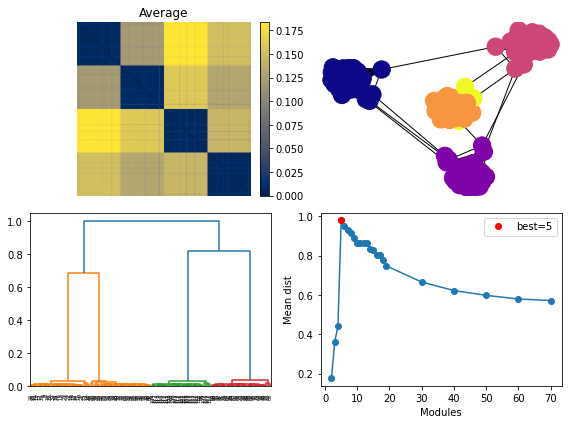

In [17]:
# Opz 3
res_nvm = clustering.clustering_jacobian_distance(A_gn, 'NoisyVM', clust_max=20, tmax=2, norm=False, norm_ind=True, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: NoisyVM


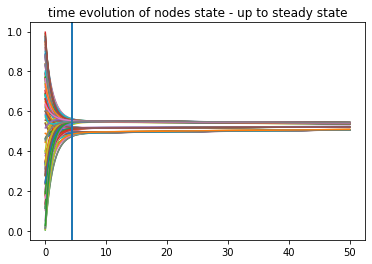

Normalizing jacobian - $\lambda_{max}=$1.3748198219381764
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...
Normalizing jacobian - $\lambda_{max}=$0.00815495240866204
Normalizing jacobian - $\lambda_{max}=$0.013595179448653653
Normalizing jacobian - $\lambda_{max}=$0.017249139339915547
Normalizing jacobian - $\lambda_{max}=$1.01249678180776
Normalizing jacobian - $\lambda_{max}=$1.029153571724311
Normalizing jacobian - $\lambda_{max}=$1.063457093171715
Normalizing jacobian - $\lambda_{max}=$1.0726488842172877
Normalizing jacobian - $\lambda_{max}=$1.112189567266192
Normalizing jacobian - $\lambda_{max}=$1.112242039373412
Normalizing jacobian - $\lambda_{max}=$1.115991195714352
Normalizing jacobian - $\lambda_{max}=$1.117345140549232
Normalizing jacobian - $\lambda_{max}=$1.1195610854538882
Normalizing jacobian - $\lambda_{max}=$1.1779303115182305
Normalizing jacobian - $\lambda_{max}=$1.1779347198198045
Normalizing jacobian - $\lambda_{max}=$1.1803178461020407
Normalizing jacobian - $\lambda_{max}=$1.18031985

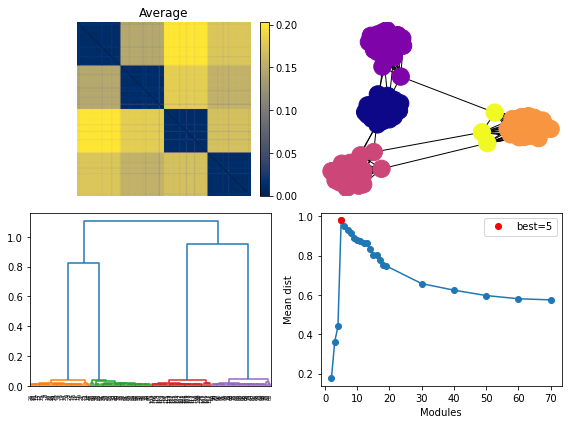

In [18]:
# Opz 4
res_nvm = clustering.clustering_jacobian_distance(A_gn, 'NoisyVM', clust_max=20, tmax=2, norm=True, norm_ind=True, show=True, method='ward')

# Jacobian distance - Synchronization

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Synchronization


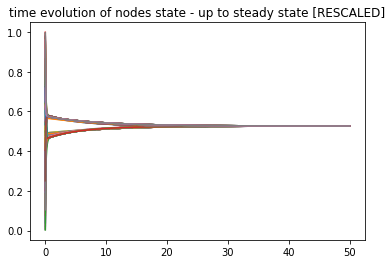

- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method complete...
- Loop over induced graphs...


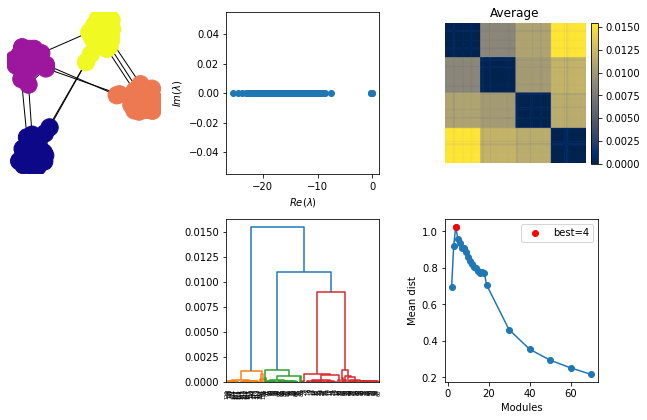

In [55]:
res = clustering.clustering_jacobian_distance(A_gn, 'Synchronization', norm=False, method='complete')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Synchronization


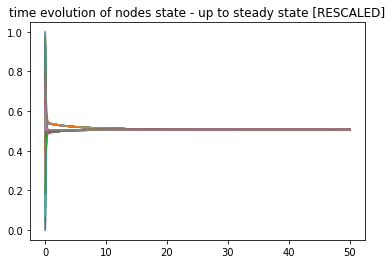

Normalizing jacobian - $\lambda_{max}=$25.46835508931146
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method complete...
- Loop over induced graphs...


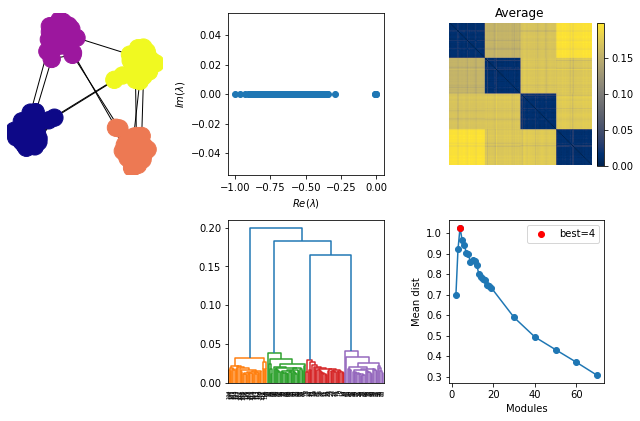

In [56]:
res = clustering.clustering_jacobian_distance(A_gn, 'Synchronization', norm=True, method='complete')

# Epidemics

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Epidemics


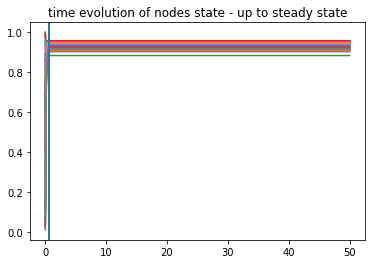

- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


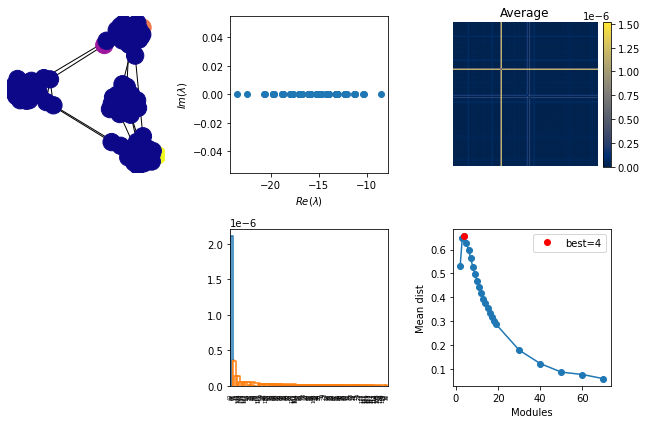

In [57]:
res = clustering.clustering_jacobian_distance(A_gn, 'Epidemics', norm=False, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Epidemics


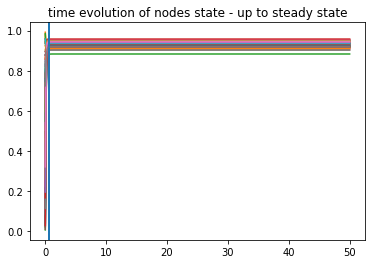

Normalizing jacobian - $\lambda_{max}=$23.508466170378266
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


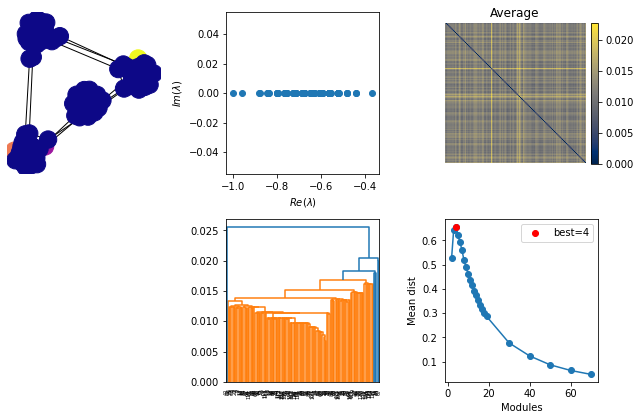

In [58]:
res = clustering.clustering_jacobian_distance(A_gn, 'Epidemics', norm=True, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Epidemics


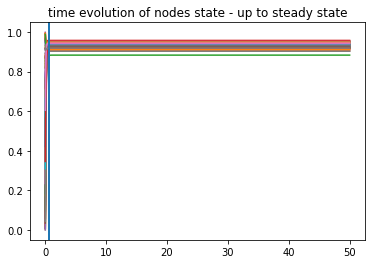

Normalizing jacobian - $\lambda_{max}=$23.501865304552776
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


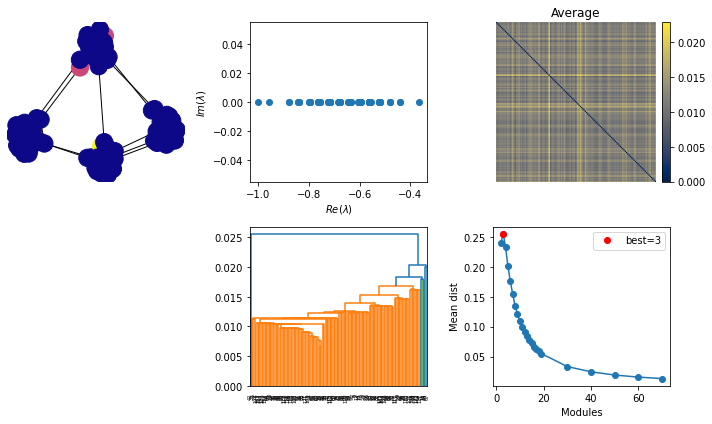

In [62]:
res = clustering.clustering_jacobian_distance(A_gn, 'Epidemics', norm=True, show=True, method='ward', args=[1, 0.5])

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Epidemics


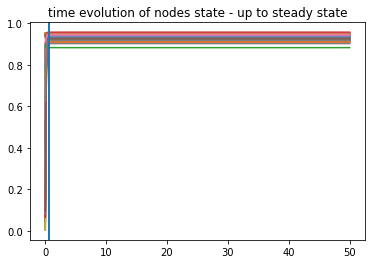

Normalizing jacobian - $\lambda_{max}=$23.499589352951013
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


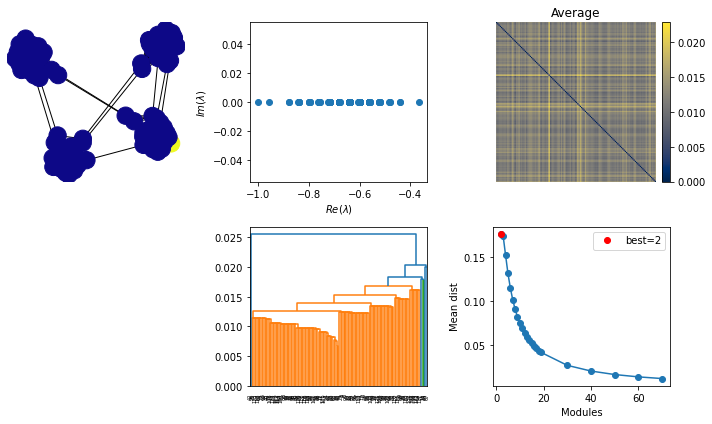

In [63]:
res = clustering.clustering_jacobian_distance(A_gn, 'Epidemics', norm=True, show=True, method='ward', args=[1, 0.1])

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Epidemics


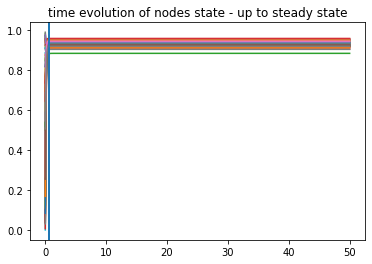

Normalizing jacobian - $\lambda_{max}=$23.659199073743135
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


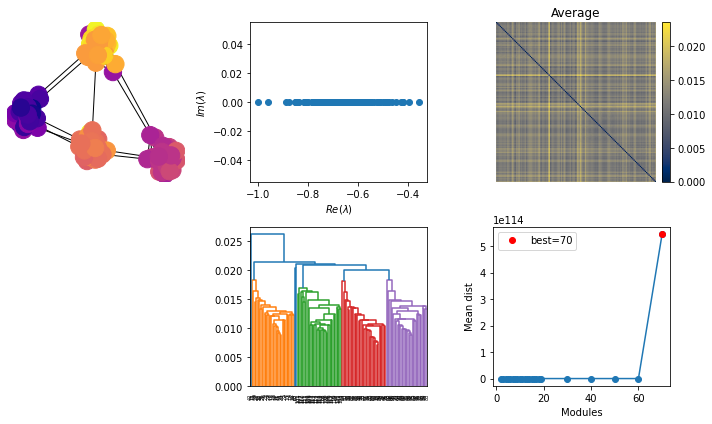

In [64]:
res = clustering.clustering_jacobian_distance(A_gn, 'Epidemics', norm=True, show=True, method='ward', args=[1, 5])

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Epidemics


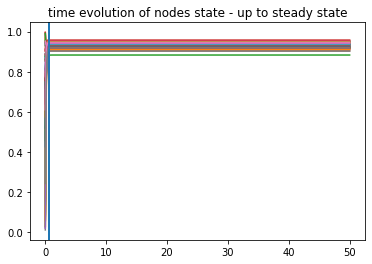

Normalizing jacobian - $\lambda_{max}=$23.995686161360748
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Loop over induced graphs...


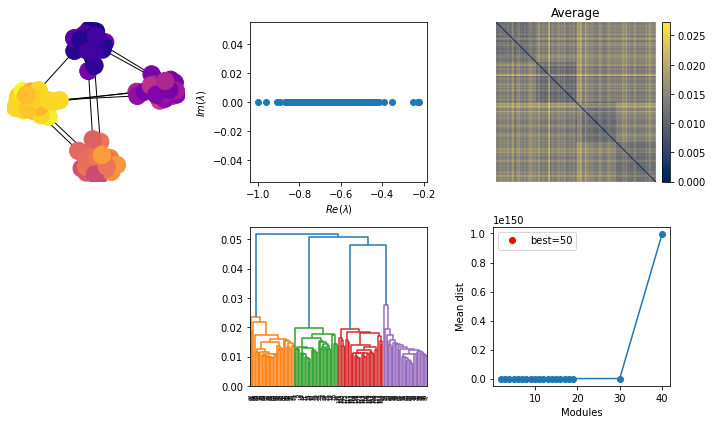

In [65]:
res = clustering.clustering_jacobian_distance(A_gn, 'Epidemics', norm=True, show=True, method='ward', args=[1, 10])